In [1]:
import pandas as pd
import greenseattle

In [2]:
all_data = pd.read_csv('all_data.csv')

In [3]:
all_data.head()

,Unnamed: 0,ZIPCODE,Year,AAWDT,Total_Population,Pop_fraction,RACK_CAPACITY,Miles_Bike_Lanes
0,0,98101,2007,264800.0,9478.973121,0.016191,16,0.000000
1,1,98101,2008,254100.0,9583.147981,0.016191,42,0.320152
2,2,98101,2009,254100.0,9691.127797,0.016191,68,0.583919
3,3,98101,2010,257900.0,9855.000000,0.016191,72,0.000000
4,4,98101,2011,353100.0,10082.228780,0.016191,92,0.000000


In [4]:
from greenseattle import prepare_nn

In [5]:
prepare_nn()

(array([[-0.17906755,  0.26202634,  0.2363797 ,  0.28750965,  0.6289611 ,
          0.45416996, -0.9590574 , -0.05019834,  0.28344128,  0.33178696,
         -0.5465598 , -0.00760016, -0.6360504 ,  0.5335889 , -0.02021984,
          0.24043456,  0.50175506, -0.61102384, -0.18362442, -0.39246252,
          0.3538545 , -0.65353465, -0.613425  ,  0.18893142,  0.21255577,
          0.29465497,  0.14827046, -0.67274725,  0.4461455 , -0.0719069 ,
         -0.12545002,  0.6044035 ],
        [ 0.14013894, -0.34798312, -0.11416787, -0.8136339 ,  0.2172877 ,
         -0.29543042, -1.4912908 ,  0.8764465 ,  0.95113707, -0.7244994 ,
          0.28949872, -1.1436222 ,  0.12789246,  1.4692296 , -0.81889373,
         -0.31377923, -0.7846423 ,  0.4225787 ,  0.28050178,  0.6895374 ,
         -0.4174392 ,  0.48400578,  0.5350282 , -0.6343307 , -0.8037372 ,
          0.05790073, -0.60958356, -0.10287935, -0.2802802 ,  0.6725543 ,
          0.17152123, -0.40634778],
        [ 0.38510013,  0.20864101, -0.18

In [6]:
zip_list = list(all_data['ZIPCODE'].unique())

/mnt/c/Users/spris/Desktop/DIRECT/Project/Visualization/pred_demo/greenseattle.py:100: RuntimeWarning: divide by zero encountered in log
  ax.plot(list_proportion, np.log(pop_val),
/mnt/c/Users/spris/Desktop/DIRECT/Project/Visualization/pred_demo/greenseattle.py:114: RuntimeWarning: divide by zero encountered in log
  matrix = np.stack((np.log(pop_val), np.log(rack_val),
/mnt/c/Users/spris/Desktop/DIRECT/Project/Visualization/pred_demo/greenseattle.py:100: RuntimeWarning: divide by zero encountered in log
  ax.plot(list_proportion, np.log(pop_val),
/mnt/c/Users/spris/Desktop/DIRECT/Project/Visualization/pred_demo/greenseattle.py:114: RuntimeWarning: divide by zero encountered in log
  matrix = np.stack((np.log(pop_val), np.log(rack_val),
/mnt/c/Users/spris/Desktop/DIRECT/Project/Visualization/pred_demo/greenseattle.py:100: RuntimeWarning: divide by zero encountered in log
  ax.plot(list_proportion, np.log(pop_val),
/mnt/c/Users/spris/Desktop/DIRECT/Project/Visualization/pred_demo/green

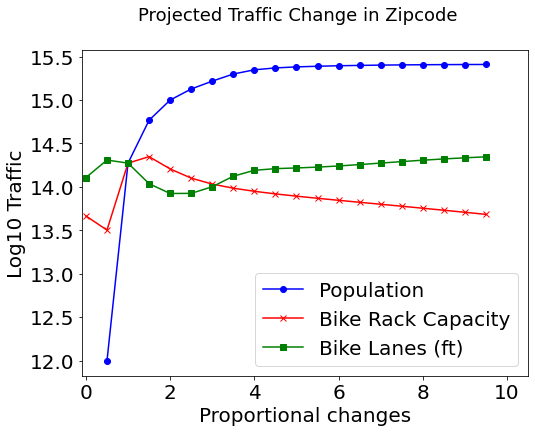

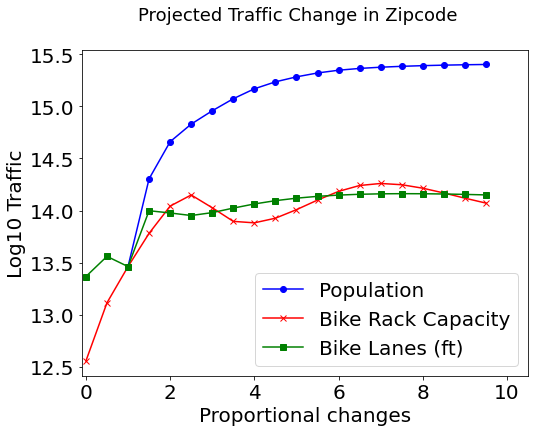

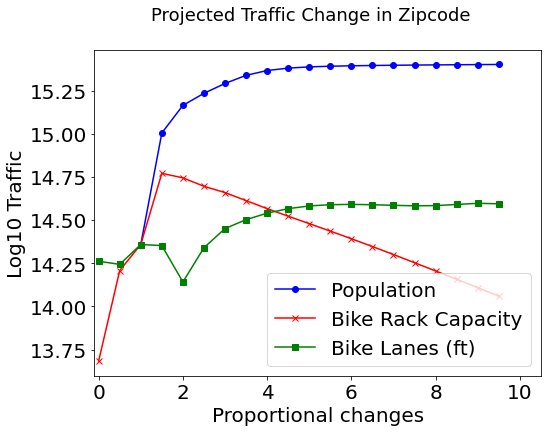

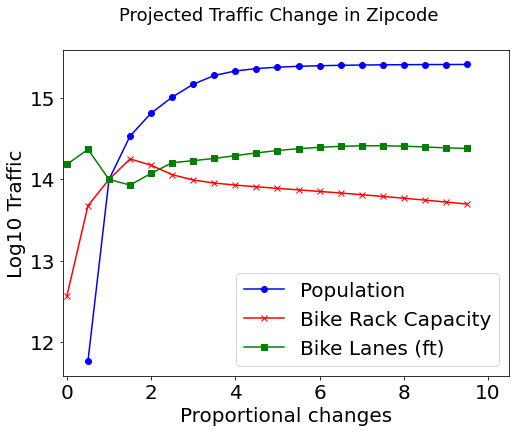

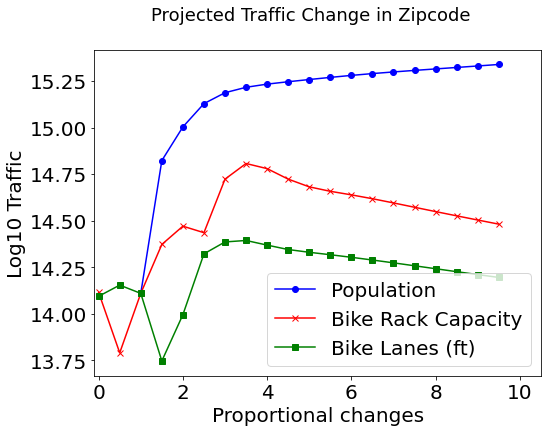

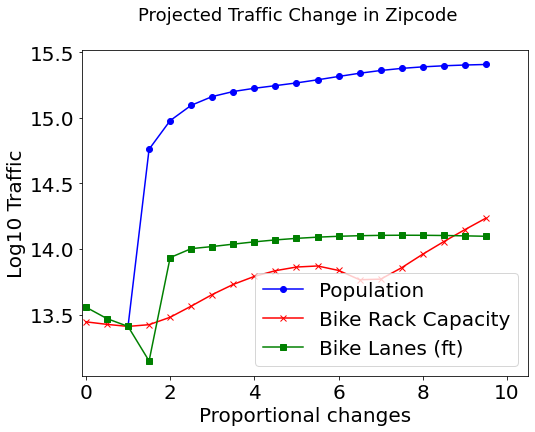

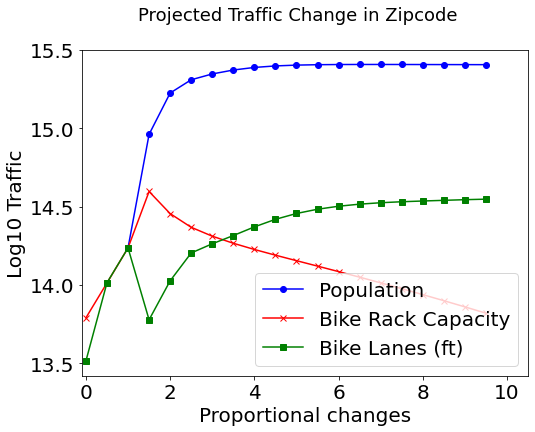

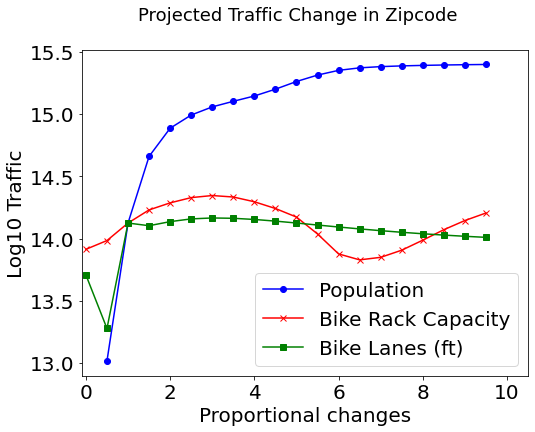

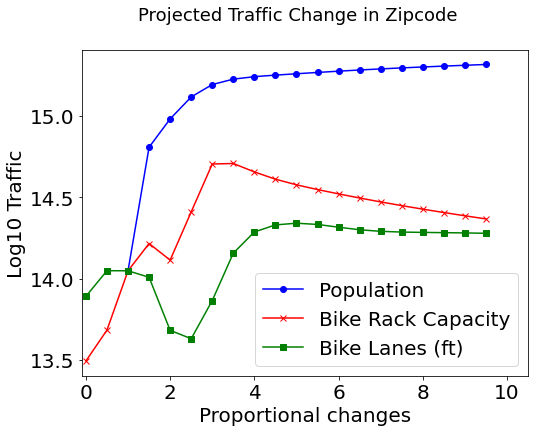

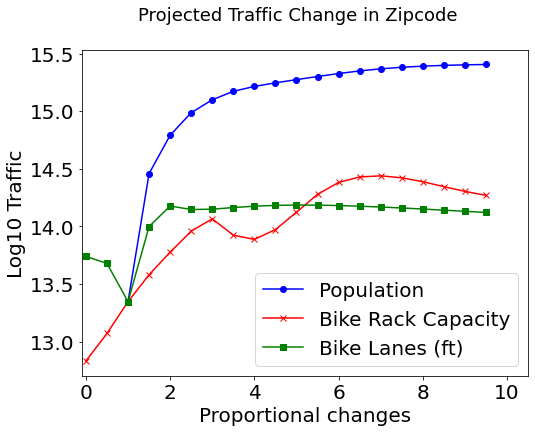

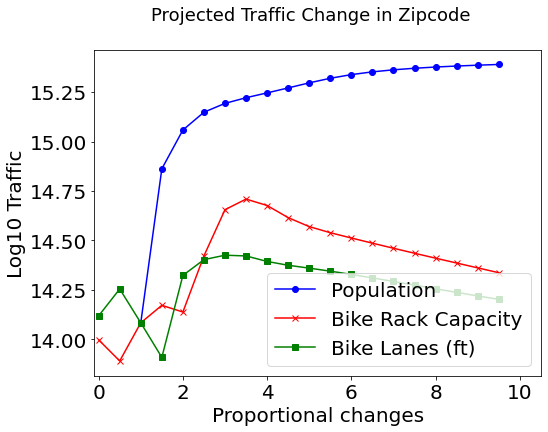

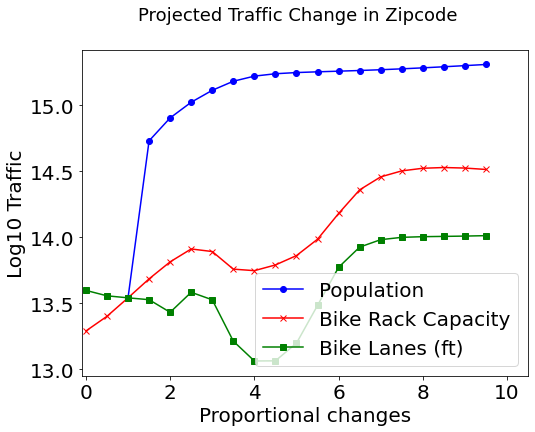

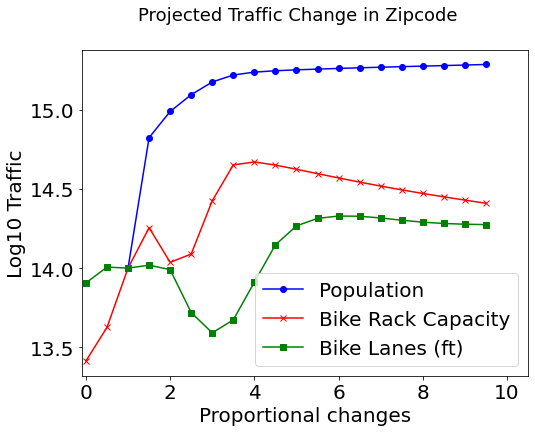

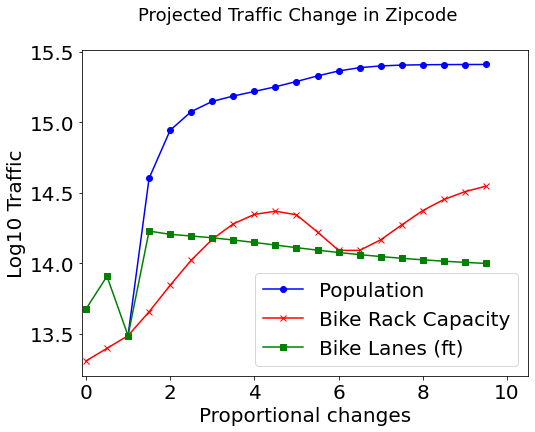

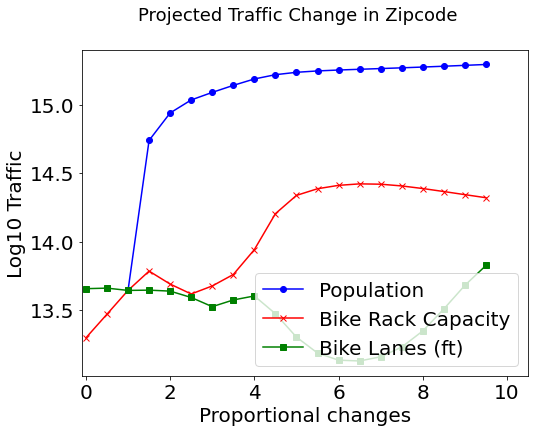

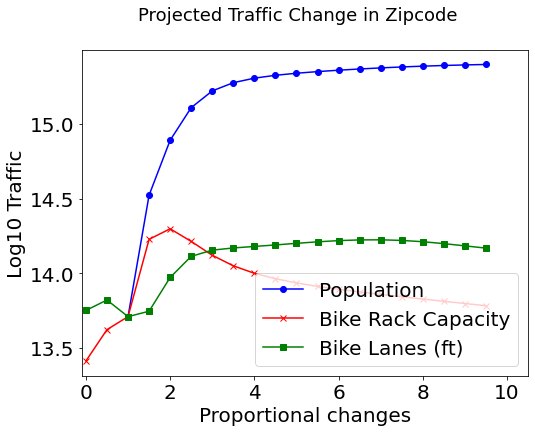

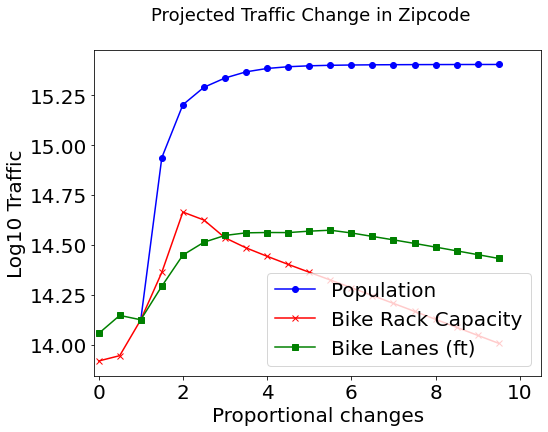

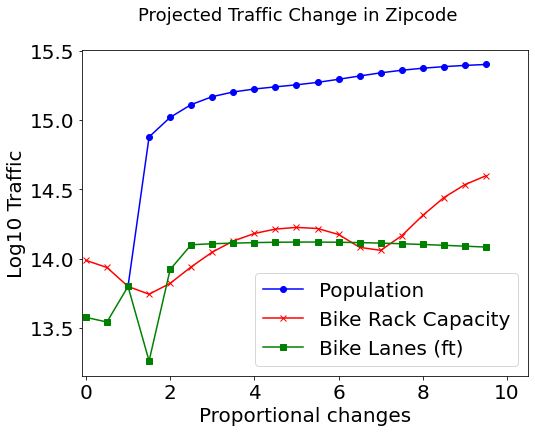

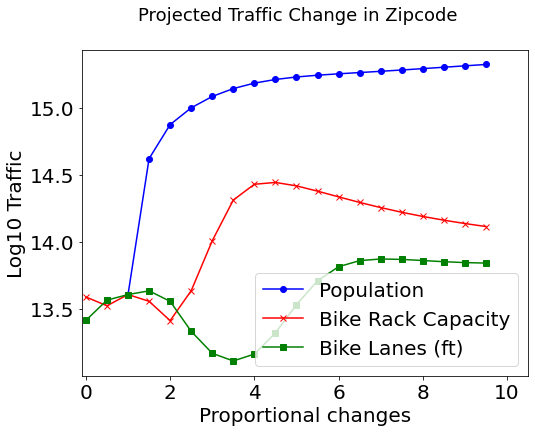

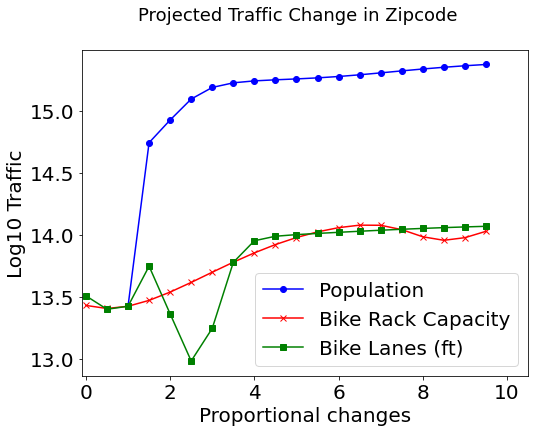

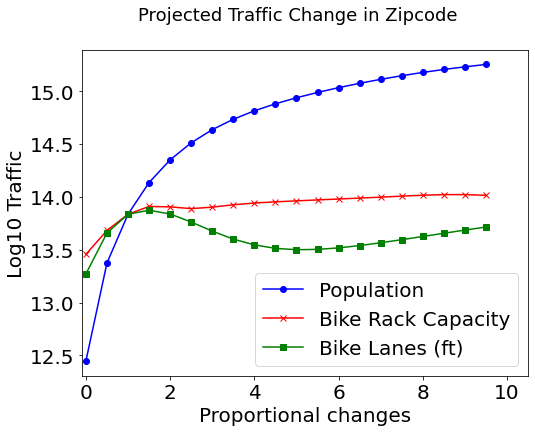

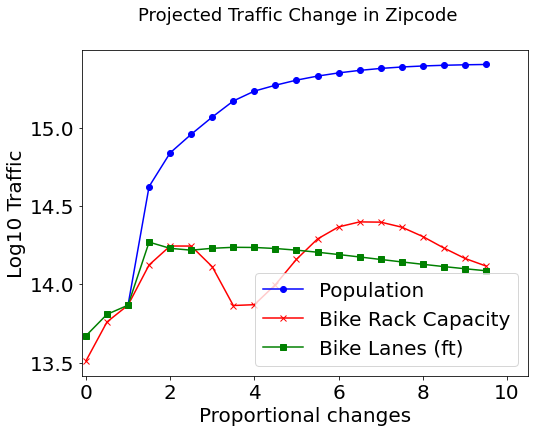

In [7]:
pred_df = pd.DataFrame()
for zipcode in zip_list:
    tmp = greenseattle.model_viz(zipcode)
    tmp_df = pd.DataFrame(tmp)
    pred_df = pred_df.append(tmp_df)

In [8]:
pred_df.head()

,0,1,2,3
0,-inf,13.665233,14.106804,98101.0
1,11.995554,13.502322,14.308707,98101.0
2,14.272919,14.272919,14.272919,98101.0
3,14.766827,14.347729,14.036303,98101.0
4,14.999076,14.206325,13.923602,98101.0


In [9]:
pred_df.rename(columns={0: 'Traffic Count 0', 1: 'Traffic Count 1', 2: 'Traffic Count 2', 3: 'ZIPCODE'}, inplace = True)

In [10]:
pred_df.head()

,Traffic Count 0,Traffic Count 1,Traffic Count 2,ZIPCODE
0,-inf,13.665233,14.106804,98101.0
1,11.995554,13.502322,14.308707,98101.0
2,14.272919,14.272919,14.272919,98101.0
3,14.766827,14.347729,14.036303,98101.0
4,14.999076,14.206325,13.923602,98101.0


In [11]:
change_5_df = pd.DataFrame()
for zipcode in zip_list:
    tmp = pred_df.loc[pred_df['ZIPCODE'] == zipcode]
    change_5_df = change_5_df.append(tmp.loc[5])
    
change_5_df

,Traffic Count 0,Traffic Count 1,Traffic Count 2,ZIPCODE
5,15.126439,14.100403,13.925010,98101.0
5,14.829895,14.149847,13.952809,98102.0
5,15.234565,14.696148,14.339992,98103.0
5,15.005743,14.054963,14.201452,98104.0
5,15.128982,14.435884,14.322295,98105.0
5,15.096050,13.564472,14.002824,98106.0
5,15.310244,14.368946,14.205220,98107.0
5,14.992144,14.328739,14.157743,98108.0
5,15.116866,14.409922,13.630378,98109.0
5,14.987411,13.958960,14.146981,98112.0


In [12]:
import get_geodata

In [13]:
from get_geodata import get_zipcode_bounds

In [14]:
zips = get_zipcode_bounds()

In [15]:
zips.reset_index(inplace = True)

In [16]:
zips = zips[['ZIPCODE', 'geometry']]

In [17]:
change_5_gdf = pd.merge(change_5_df, zips, on='ZIPCODE')

In [18]:
change_5_gdf

,Traffic Count 0,Traffic Count 1,Traffic Count 2,ZIPCODE,geometry
0,15.126439,14.100403,13.925010,98101.0,"POLYGON ((-122.34598 47.60892, -122.34490 47.6..."
1,14.829895,14.149847,13.952809,98102.0,"POLYGON ((-122.33574 47.64203, -122.33108 47.6..."
2,15.234565,14.696148,14.339992,98103.0,"POLYGON ((-122.35808 47.69966, -122.35741 47.6..."
3,15.005743,14.054963,14.201452,98104.0,"POLYGON ((-122.34105 47.59627, -122.34031 47.5..."
4,15.128982,14.435884,14.322295,98105.0,"MULTIPOLYGON (((-122.32859 47.66646, -122.3285..."
5,15.096050,13.564472,14.002824,98106.0,"POLYGON ((-122.37057 47.56924, -122.37056 47.5..."
6,15.310244,14.368946,14.205220,98107.0,"MULTIPOLYGON (((-122.40896 47.67540, -122.4072..."
7,14.992144,14.328739,14.157743,98108.0,"POLYGON ((-122.33799 47.53397, -122.33787 47.5..."
8,15.116866,14.409922,13.630378,98109.0,"POLYGON ((-122.35819 47.64769, -122.35810 47.6..."
9,14.987411,13.958960,14.146981,98112.0,"MULTIPOLYGON (((-122.31863 47.63041, -122.3186..."


In [22]:
type(change_5_gdf)

geopandas.geodataframe.GeoDataFrame

In [20]:
import geopandas as gpd

In [21]:
change_5_gdf = gpd.GeoDataFrame(change_5_gdf)

In [23]:
import geoplot

In [27]:
import matplotlib
import matplotlib.pyplot as plt

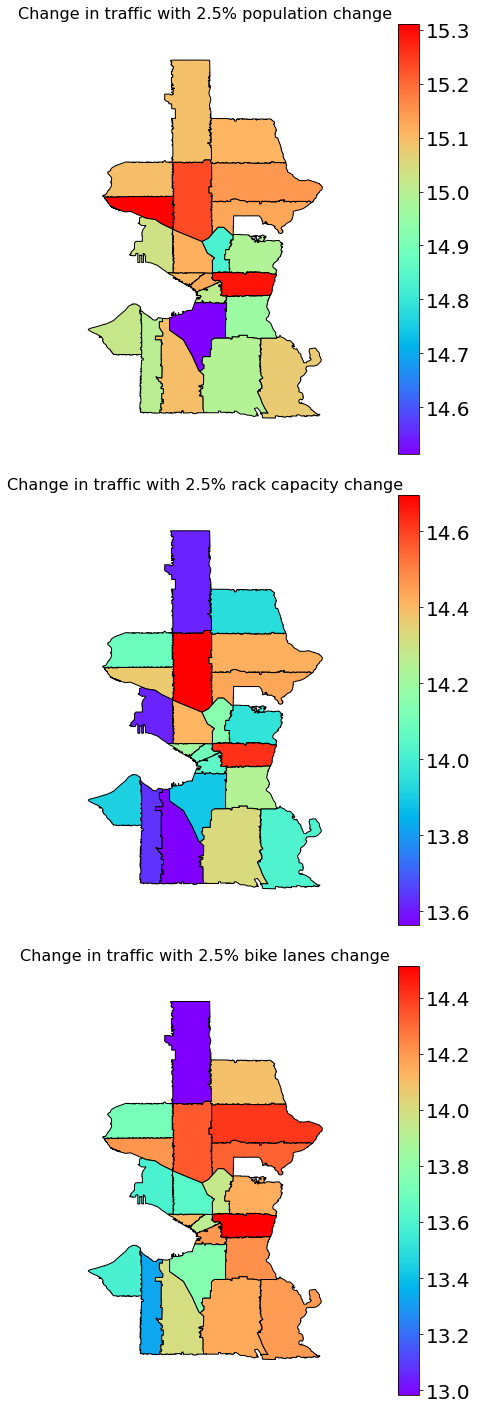

In [64]:
fig, ax = plt.subplots(nrows = 3, figsize = (15, 20))
traffic_zip_0 = change_5_gdf['Traffic Count 0']
traffic_zip_1 = change_5_gdf['Traffic Count 1']
traffic_zip_2 = change_5_gdf['Traffic Count 2']
#scheme = mapclassify.NaturalBreaks(ave_traffic, k=10)
geoplot.choropleth(change_5_gdf, hue=traffic_zip_0, cmap='rainbow', legend = True, ax=ax[0])
geoplot.choropleth(change_5_gdf, hue=traffic_zip_1, cmap='rainbow', legend = True,  ax=ax[1])
geoplot.choropleth(change_5_gdf, hue=traffic_zip_2, cmap='rainbow', legend = True,  ax=ax[2])

ax[0].set_title('Change in traffic with 2.5% population change', fontsize =16)
ax[1].set_title('Change in traffic with 2.5% rack capacity change', fontsize =16)
ax[2].set_title('Change in traffic with 2.5% bike lanes change', fontsize =16)
plt.tight_layout()
plt.show()

0 is pop, 1 is rack capacity, 2 is bike lanes